**Filtering for Feature Selection** 

In [69]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns 

In [70]:
data = pd.read_csv('./csv_files/evalcodep1.csv', index_col=0)
data = data.drop('C2', axis=1)
data.head()

,C1,C4,C6,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C3p,Industry_Bins,Y1,Y2
0,0.458312,0.630418,0.673869,0.207673,0.570284,0.441786,0.427704,0.428334,0.428161,0.397992,0.379065,0,1,0,1
1,1.000000,0.384735,0.290706,0.147494,0.698942,0.444796,0.426904,0.424499,0.400971,0.414195,0.378486,1,1,1,0
2,0.327366,0.582011,0.449107,0.078383,0.555596,0.439275,0.427741,0.437681,0.493771,0.363924,0.384058,1,1,1,0
3,0.814322,0.578004,0.423274,0.084319,0.553374,0.371690,0.428343,0.437523,0.479331,0.375764,0.401495,1,1,1,1
4,0.286445,0.259982,0.590068,0.729255,0.566377,0.404918,0.426088,0.420497,0.422876,0.405605,0.382601,0,3,0,1


In [71]:
#Changing the X and Y DataFrames to an array
array = data.values
x1 = array[:,:13]
y1 = array[:,13] #Y1 which is our Target 1
y2 = array[:,14] #Y2 which is our Target 2


In [72]:
#Going to look at Target 1 first
filtering = SelectKBest(score_func=chi2, k=4)
fit = filtering.fit(x1, y1)

np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x1)
# Summarize selected features
print(features[0:5,:])

[2.947e-01 2.838e-01 4.461e-02 1.988e-02 2.097e-02 7.771e-03 1.254e-03
 5.249e-03 2.533e-02 6.217e-02 1.289e-02 4.831e+00 2.006e+00]
[[0.458 0.63  0.    1.   ]
 [1.    0.385 1.    1.   ]
 [0.327 0.582 1.    1.   ]
 [0.814 0.578 1.    1.   ]
 [0.286 0.26  0.    3.   ]]


In [73]:
#Going to look at Target 2 second
filtering = SelectKBest(score_func=chi2, k=4)
fit = filtering.fit(x1, y2)

np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x1)
# Summarize selected features
print(features[0:5,:])

[1.043e-01 3.515e-01 3.083e-02 7.584e-01 1.288e-02 4.176e-04 1.432e-02
 6.492e-03 2.974e-02 5.367e-02 6.550e-03 4.211e-01 2.095e+00]
[[0.63  0.208 0.    1.   ]
 [0.385 0.147 1.    1.   ]
 [0.582 0.078 1.    1.   ]
 [0.578 0.084 1.    1.   ]
 [0.26  0.729 0.    3.   ]]


Text(0.5, 1.0, 'Correlation Heatmap')

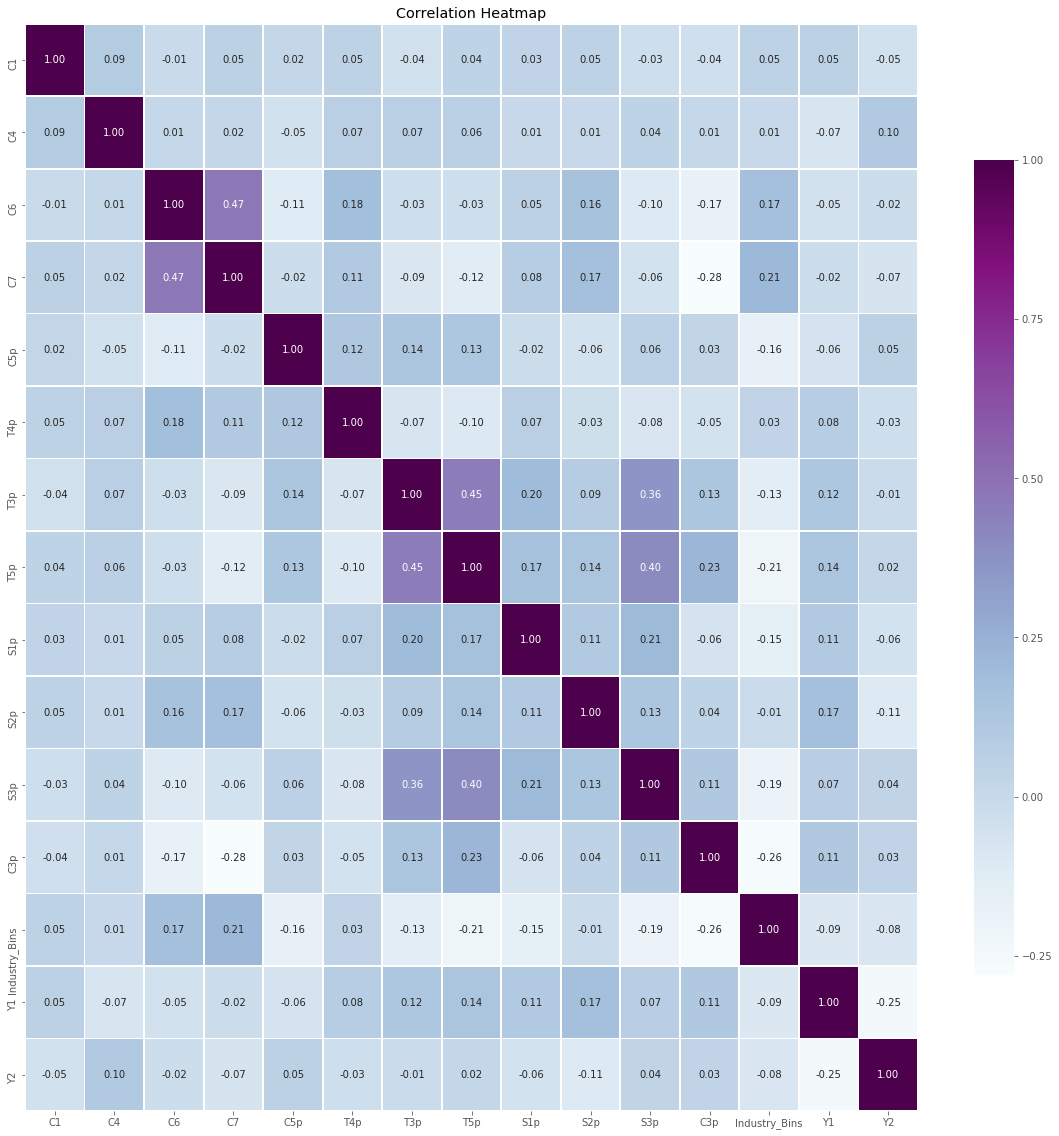

In [74]:
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')